# LIS590DV Final Project: Task One.

## Group: Whale.

**Yingjun Guan, Xiaoliang Jiang, Xinyu Zhang, Jialu Wang.
The first task is based on the Champaign-Urbana Metro Transit District (CUMTD). From the data source (http://developer.cumtd.com/), the data and the corresponding documentation can be found. The data involves the information of agency (agency.txt), running schedule (calendar.txt), running exception schedule (calendar_dates.txt), stops (stops.txt), stop time(stop_time.txt), routes of all trafic (routes.txt), shapes of the routes - timely records rather than the stops(shapes.txt), daily time schedule (trips.txt), and the fare information (fare_rules.txt and fare_attributes.txt)**

We did two parts for task one: statistical analysis and coding part. Based on the basic evalution of each table, we created charts to represent traffic running days, stops per trip, amount of trips per stop, as well as stops per location. We also created a chart of physical path for every vehicle takes, and made heatmap to analyze stop density, then tested  accessability and walkability with different sized buffer areas.

Those approaches help us 

stop density, distance interval 

bus distribution 
routes length 
average stop interval
routes: number of trips

wish to do : How to let the ploting area be a perfect square


## 1. What is CUMTD running schedule?

### By playing with the data, the first thing that can be checked is the running schedule. All the traffic runs from Dec. 18, 2016 to May 13 2017, 147 days in all. For all 288 different trips, 43 of them run for 105 days, 23 of them fun for 89 days, 12 of them run for 80 days, 2 of them run for 77 days, 17 for 70 days, 12 for 64 days, 1 for 61 days, 15 for 20-50 days, 124 for 10-20 days, 40 for less than 10 days.


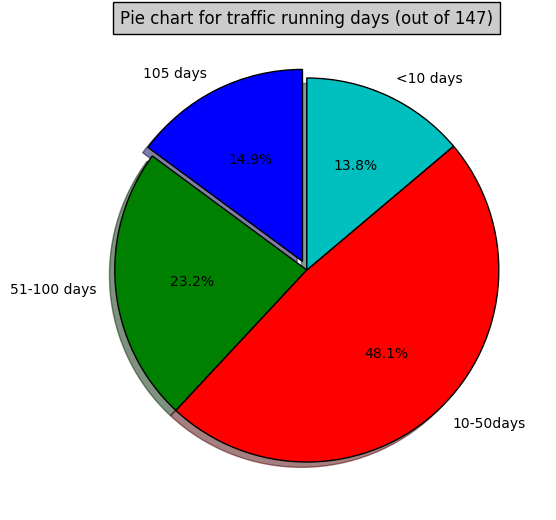

In [1]:
#1. Yingjun Guan
from pylab import *

# make a square figure and axes
figure(1, figsize=(6,6))
ax = axes([0.1, 0.1, 0.8, 0.8])

# The slices will be ordered and plotted counter-clockwise.
labels = '105 days', '51-100 days', '10-50days', '<10 days'
fracs = [43/289, 67/289, 139/289, 40/289]
explode=(0.05, 0, 0, 0)

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=True, startangle=90)
                # The default startangle is 0, which would start
                # the Frogs slice on the x-axis.  With startangle=90,
                # everything is rotated counter-clockwise by 90 degrees,
                # so the plotting starts on the positive y-axis.

title('Pie chart for traffic running days (out of 147)', bbox={'facecolor':'0.8', 'pad':5})

show()

### From the figure, it can be seen that 14.9% of the buses run 105 days out of 147 days, which is every weekday (Mon to Fri of each week), and 13.8% of buses run less than 10 days, which is only on special days or special uses. 


In [2]:
# 2. Jialu Wang
#enable plotting
%matplotlib inline

#import packages
import matplotlib.pyplot as plt
import numpy as np
import csv
import collections
from collections import Counter

#set graph size
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
#read the file
fn = "stop_times.txt"
with open(fn, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    data = {}
    for column in header:
        data[column] = []
    for row in reader:
        for column, value in zip(header, row):
            data[column].append(value)
            
fn1 = "stops.txt"
with open(fn1, "r") as f1:
    reader1 = csv.reader(f1)
    header1 = next(reader1)
    data1 = {}
    for column1 in header1:
        data1[column1] = []
    for row1 in reader1:
        for column1, value1 in zip(header1, row1):
            data1[column1].append(value1)
            
fn2 = "routes - routes.csv.csv"
with open(fn2, "r") as f2:
    reader2 = csv.reader(f2)
    header2 = next(reader2)
    data2 = {}
    for column2 in header2:
        data2[column2] = []
    for row2 in reader2:
        for column2, value2 in zip(header2, row2):
            data2[column2].append(value2)

### i.	agency.txt File

### An Agency is an operator of a public transit network, often a public authority.
### There is only one instance in the file specifying the full name, URLs, phone numbers, and language indicators of our studying object CUMTD.


### ii.	stops.txt File

### A stop is a location where vehicles stop to pick up or drop off passengers. Stops are defined in the file stops.txt. 

### Stops can be grouped together, such as when there are multiple stops within a single station. There are 2,496 different stops in 1,353 different stations, as in Figure.1. There are 448 stations with single stops, 746 stations with two stops, 97 stations with 3 stops, 46 stations with 4 stops, 15 stations with 5 stops and one station with 6 stops. The mean of number of stops per station is 1.84 while the median is 2. 

### Stations with the most stops are: ('MTD7311', 6), ('MTD2554', 5), ('MTD1333', 5), ('MTD2353', 5), ('MTD7267', 5), ('MTD5671', 5), ('MTD2643', 5), ('MTD3014', 5), ('MTD3451', 5), ('MTD7036', 5), ('MTD3250', 5), ('MTD3254', 5), ('MTD3747', 5), ('MTD6052', 5), ('MTD3562', 5), ('MTD4573', 5), station and number of stops respectively. 

## 2. How many stops on each station?


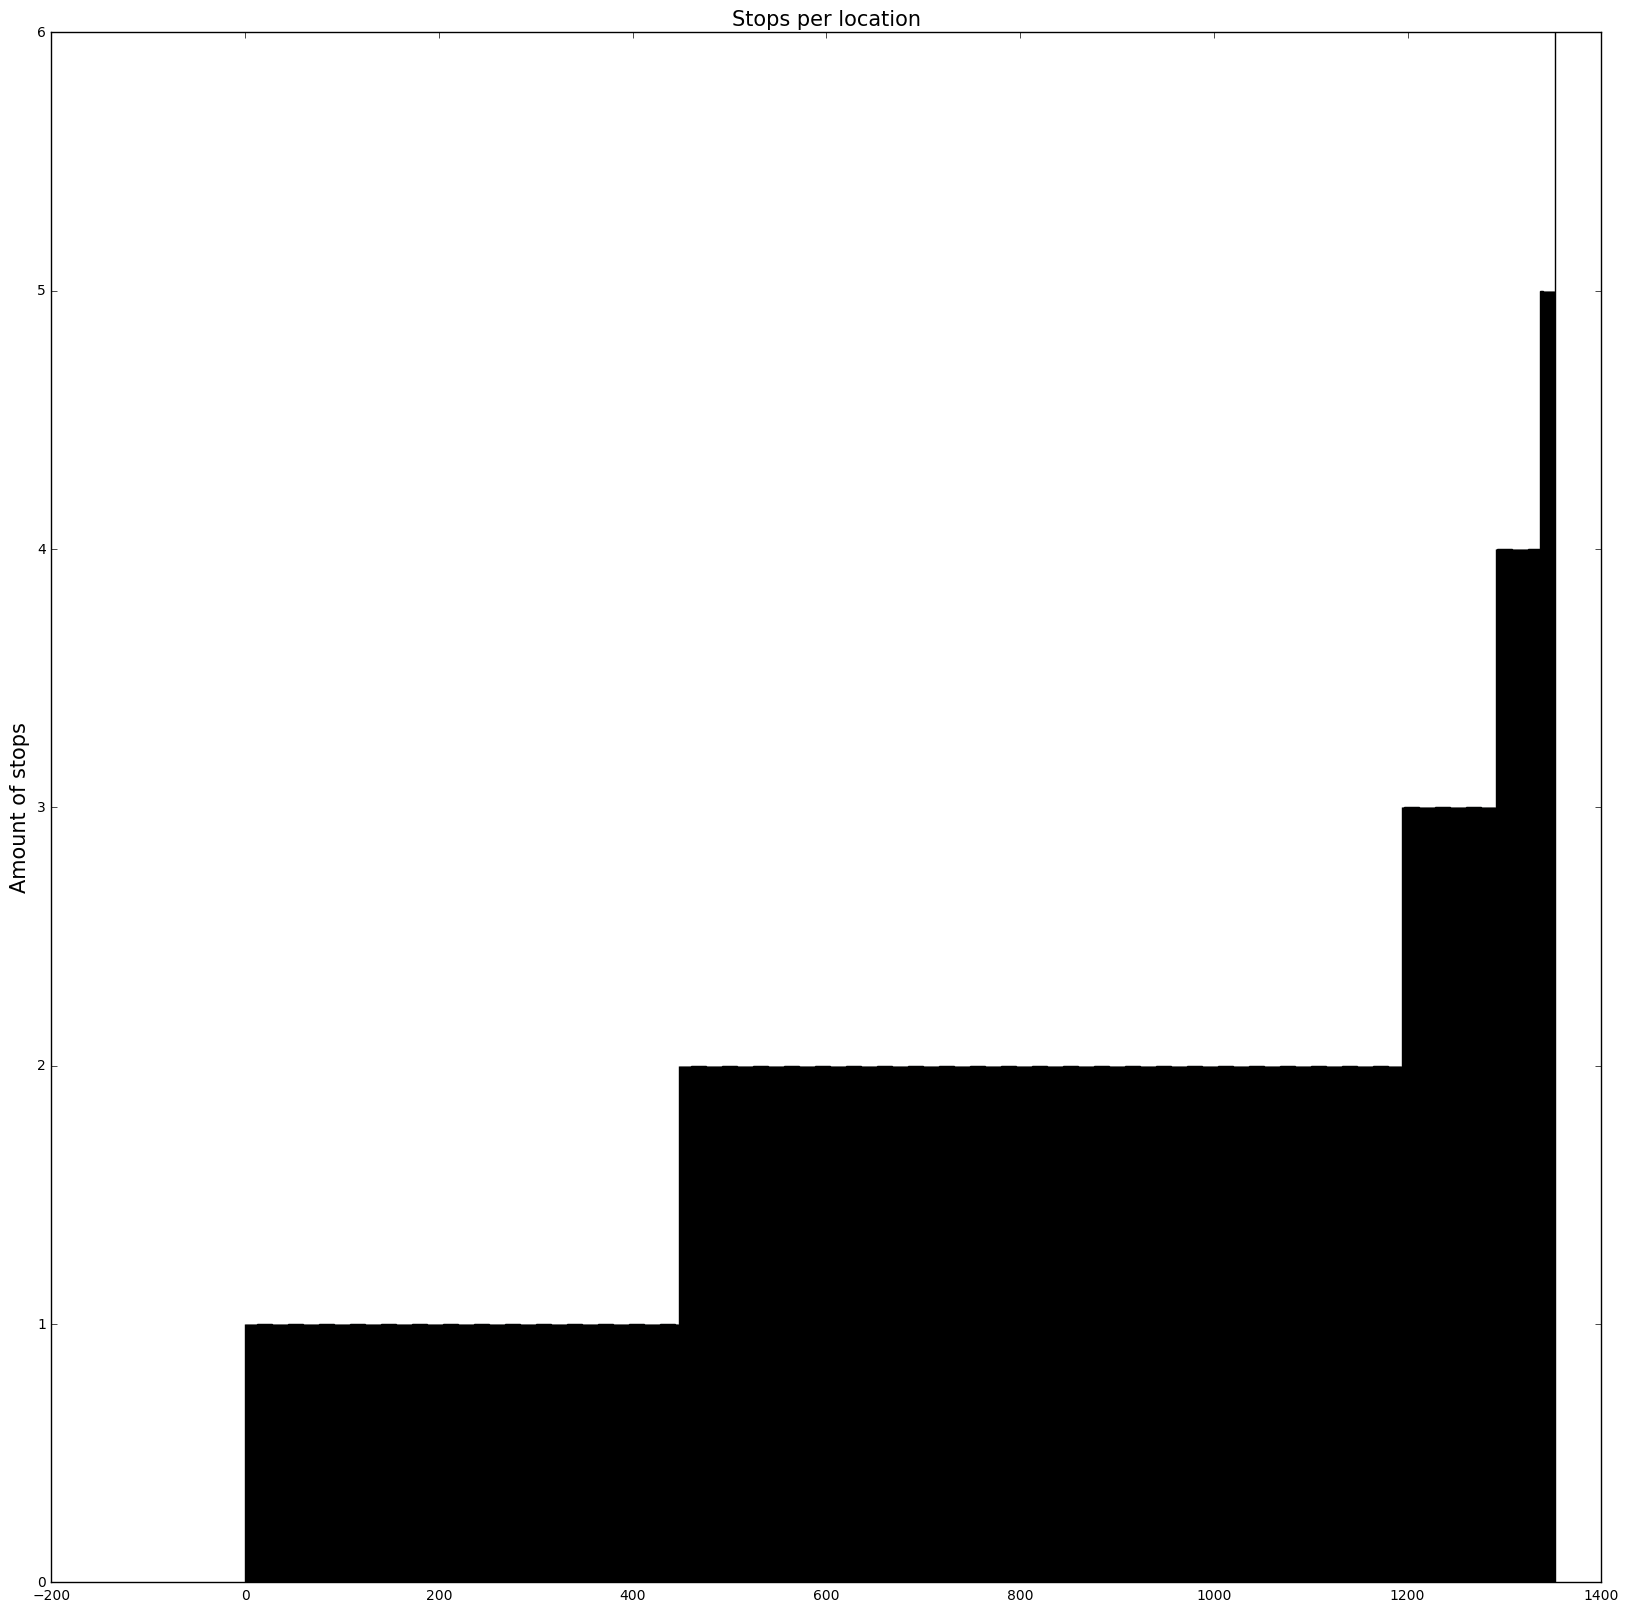

In [41]:
location_count={}
for code in data1['stop_code']:
    if code not in location_count.keys():
        location_count[code]=1
    else:
        location_count[code]+=1
        
e = Counter(location_count)
sorted_e=sorted(e.items(), key=lambda e: e[1])
x_val = [x[0] for x in sorted_e]
y_val = [x[1] for x in sorted_e]
x_pos = np.arange(len(x_val)) 
plt.bar(x_pos,y_val,align='center', width=0.5, color='c')
plt.ylabel('Amount of stops',fontsize=15)
plt.title('Stops per location',fontsize=15)
plt.show()

### Stops may also have zone identifiers, to group them together into zones. This can be used together with Fare Attributes and Fare Rules for zone-based ticketing. However, as there are only two fare categories, we skip this step.


### iii.	stop_times.txt File

### A StopTime defines when a vehicle arrives at a location, how long it stays there, and when it departs. StopTimes define the path and schedule of Trips. Each trip stops has the unique attribute trip_id referenced from the trips.txt. There are 242,858 different trip_id. The attribute arrival_time and departure_time specifies the arrival and departure time from a specific stop for a specific trip on a route. However, the arrival and departure time are the same for most trip_ids except 642 instance (0.26%).

   ### a.	With the 5,498 different trips, we study number of stops per trip as in Figure.2. The distribution is exponential,with the minimum of 2 (214 counts), the maximum of 147 (2 counts), the mean of 44.17 and the median of 30.
   
## 3. How many stops on each trip?

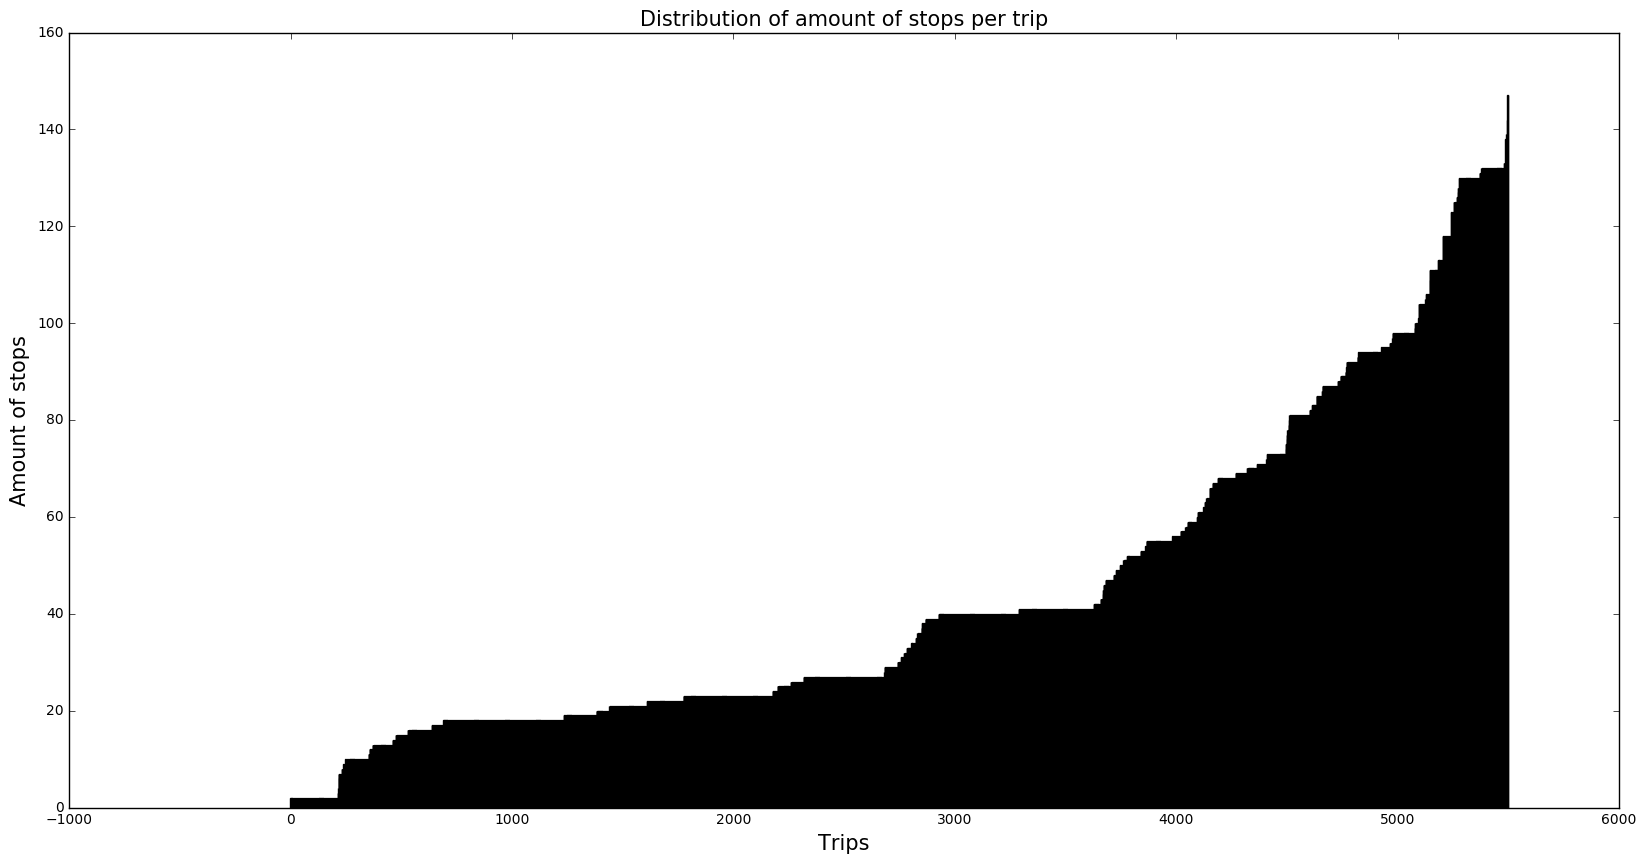

In [4]:
#amount of stops per trip
trip_count={}
for id in data['trip_id']:
    if id not in trip_count.keys():
        trip_count[id]=1
    else:
        trip_count[id]+=1

a = Counter(trip_count)
sorted_a=sorted(a.items(), key=lambda a: a[1])
x_val = np.arange(len(sorted_a))
y_val = [x[1] for x in sorted_a]
plt.bar(x_val,y_val,align='center', width=0.6, color='r')
plt.ylabel('Amount of stops',fontsize=15)
plt.xlabel('Trips', fontsize=15)
plt.title('Distribution of amount of stops per trip',fontsize=15)
plt.show()

In [5]:
len(sorted_a)


5498

### b.	We also study how many trip stops in total in a single day in a single stop (Figure.3). With the 2,496 different stops (as in stops.txt), the minimum #trip stops in a single stop per day is 1 with 55 counts while the maximum is as high as 1732 with only 1 count, the average is 97.30 times and the median is 42 times.

   
## 3. How many trips on each stop?


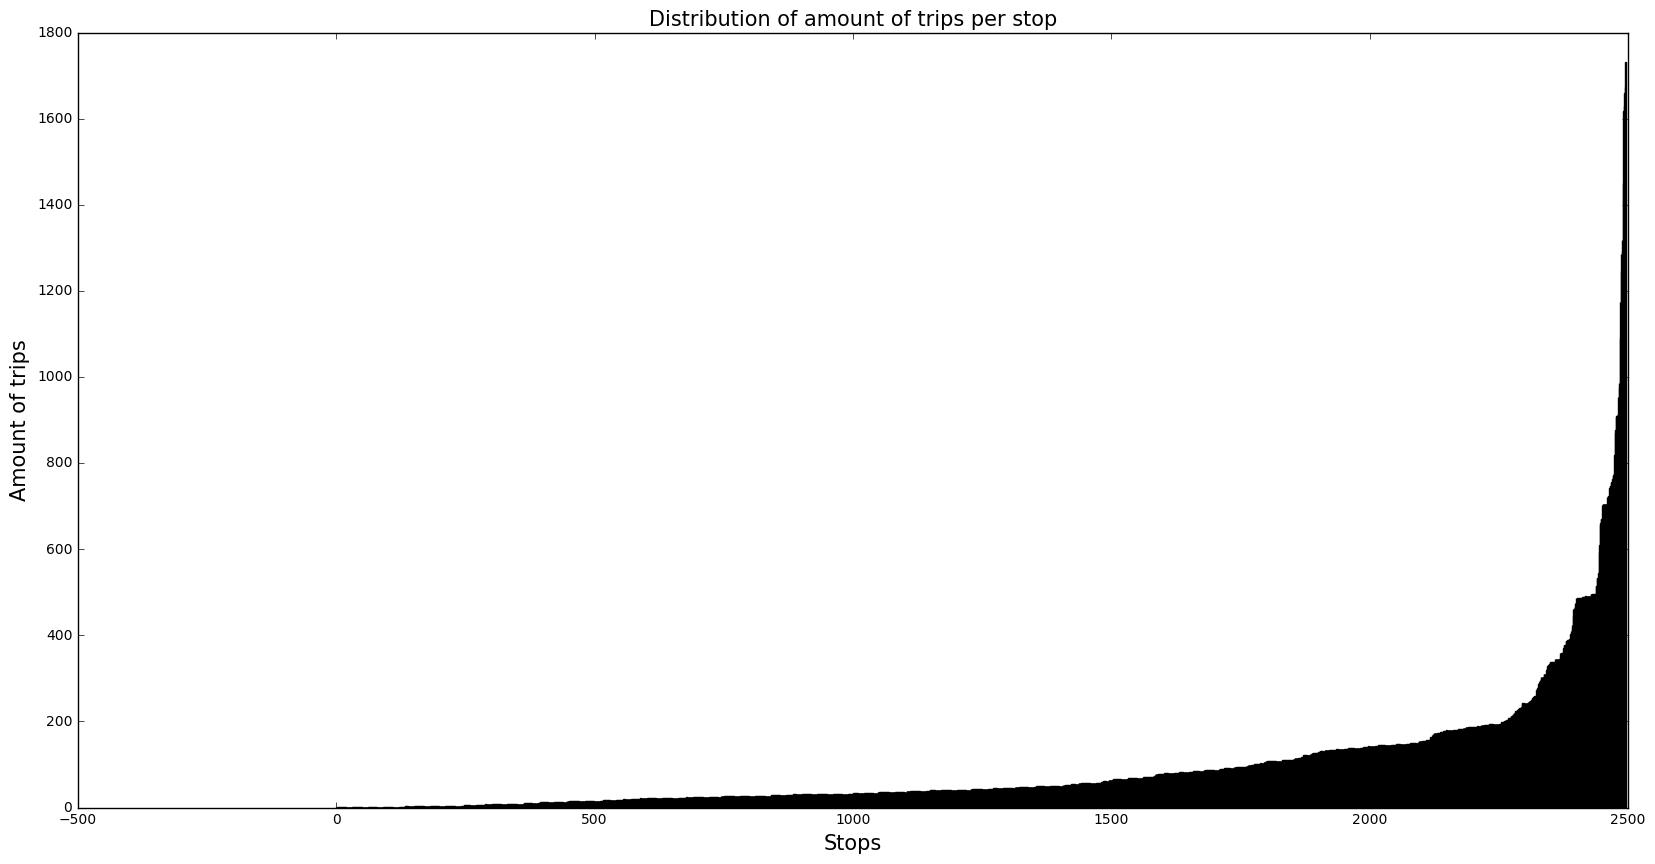

In [6]:
#amount of stops per stop
stop_count={}
for id in data['stop_id']:
    if id not in stop_count.keys():
        stop_count[id]=1
    else:
        stop_count[id]+=1
        
b = Counter(stop_count)
sorted_b=sorted(b.items(), key=lambda b: b[1])
x_val = np.arange(len(sorted_b))
y_val = [x[1] for x in sorted_b]
plt.bar(x_val,y_val,align='center', width=0.6, color='g')
plt.ylabel('Amount of trips',fontsize=15)
plt.xlabel('Stops', fontsize=15)
plt.title('Distribution of amount of trips per stop',fontsize=15)
plt.show()

In [7]:
len(sorted_b)


2496

### For better understanding of the statistics, we highlight the 20 stops with the most trip stops everyday. They are: ('ODSS:1', 877), ('GWNNV:4', 908), ('CHEMLS:1', 910), ('WLNTLGN:1', 911), ('WLNTUNI:2', 913), ('LNCLNKLRNY:1', 954), ('GDWNCB:1', 977), ('GDWNMRL:2', 985),  ('PAMD:2', 1091), ('PLAZA:3', 1174), ('WRTCHAL:4', 1247), ('LSE:8', 1286), ('PLAZA:4', 1292), ('IT:5', 1317), ('ARYWRT:3', 1451), ('GRNMAT:1', 1617), ('IU:2', 1629), ('GRNMAT:3', 1660), ('IU:1', 1674), ('PAR:2', 1732), stop_id and counts of trip stops respectively (Figure.4). These 20 stops are also highlighted in the map of stops.

## 4. What are the top 20 stops with most trip stops?

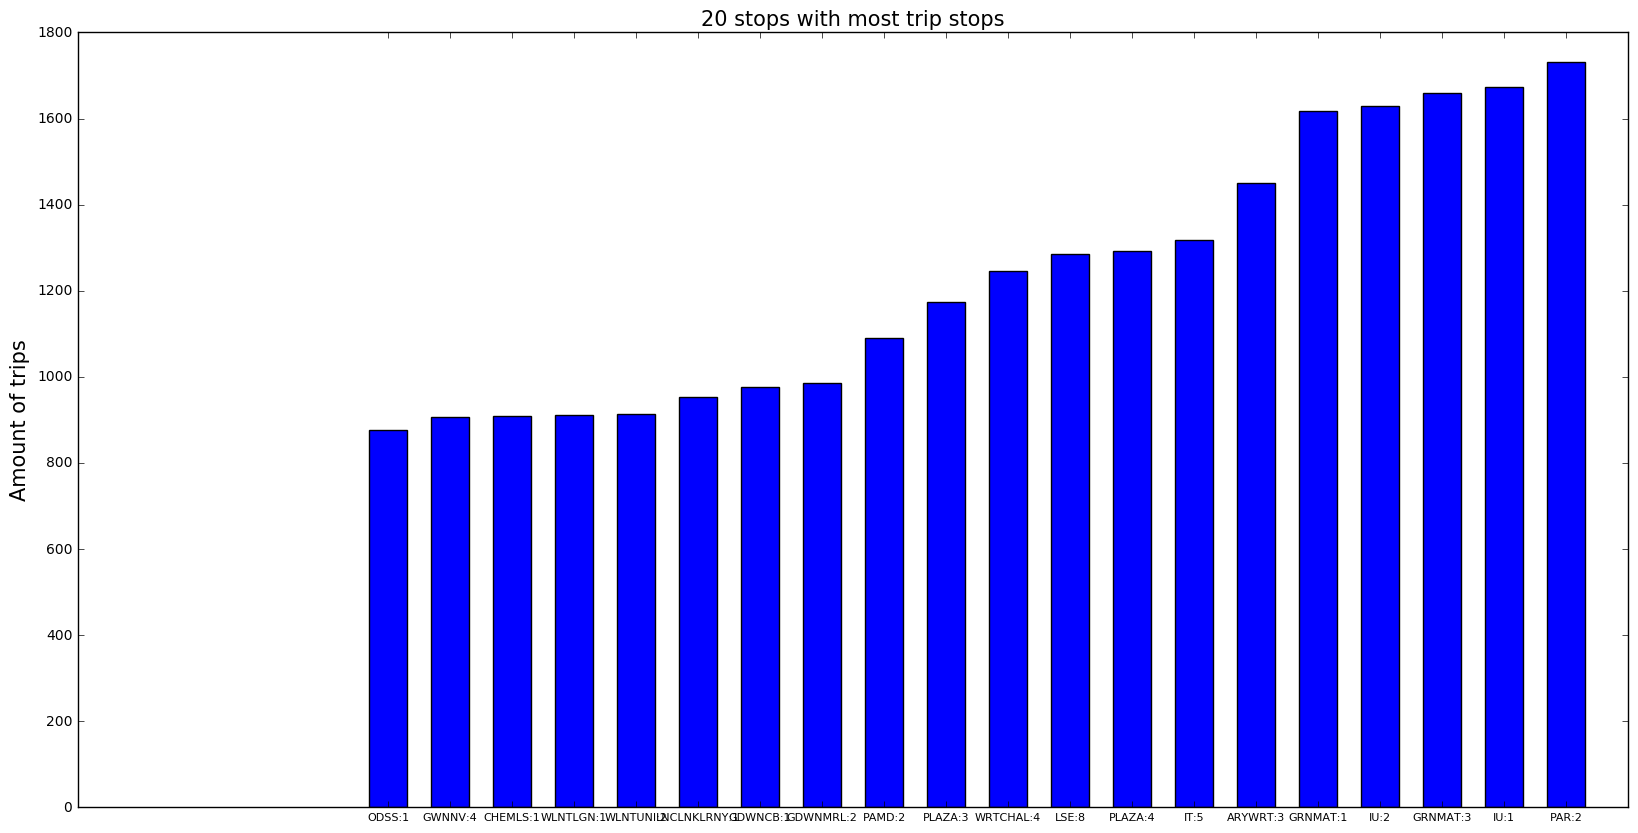

In [8]:
c=Counter(stop_count).most_common(20)
c.sort(key=lambda x: x[1]) 
x_val = list(zip(*c))[0]
y_val = list(zip(*c))[1]
x_pos = np.arange(len(x_val)) 
plt.bar(x_pos, y_val,align='center',width=0.6, color='b')
plt.xticks(x_pos, x_val,fontsize=8) 
plt.ylabel('Amount of trips',fontsize=15)
plt.title('20 stops with most trip stops',fontsize=15)
plt.show()

### iv.	routes.txt File

### GTFS Routes are equivalent to "Lines" in public transportation systems. Routes are defined in the file routes.txt, and are made up of one or more Trips. The difference between routes and trips is that a Trip occurs at a specific time while a Route is time-independent.

## 5. How many routes on each color?


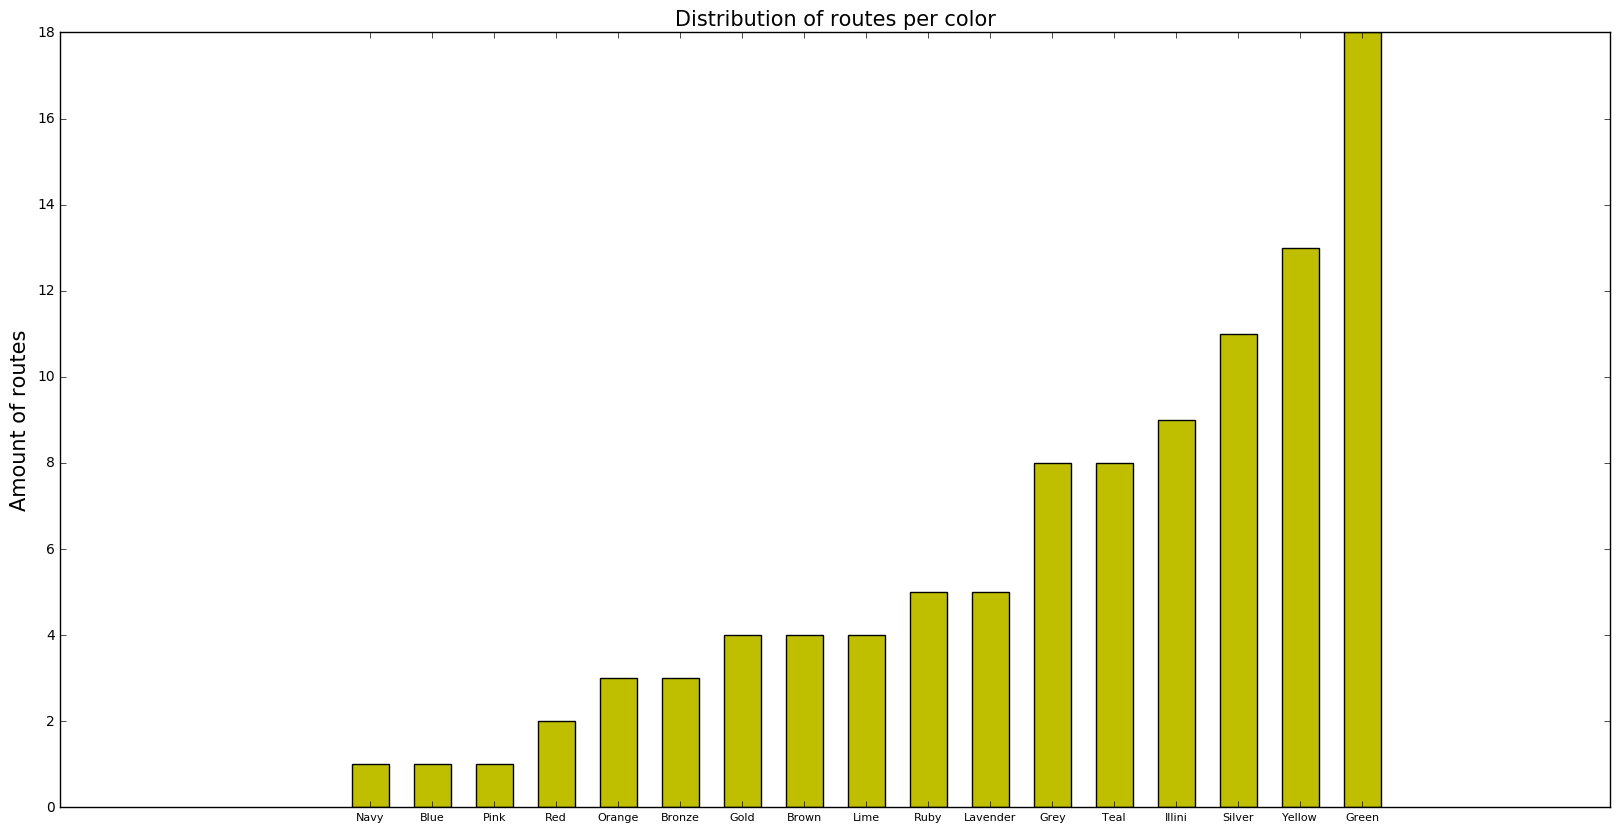

In [9]:

color_count={}
for color in data2['route_color']:
    if color not in color_count.keys():
        color_count[color]=1
    else:
        color_count[color]+=1
        
d = Counter(color_count)
sorted_d=sorted(d.items(), key=lambda d: d[1])
x_val = [x[0] for x in sorted_d]
y_val = [x[1] for x in sorted_d]
x_pos = np.arange(len(x_val)) 
plt.bar(x_pos,y_val,align='center', width=0.6, color='y')
plt.xticks(x_pos, x_val,fontsize=8)
plt.ylabel('Amount of routes',fontsize=15)
plt.title('Distribution of routes per color',fontsize=15)
plt.show()

### Here we find that there are different route_ids within a certain type of route_color. For instance, the route TEAL has route_id: TEAK, TEAL LATE NIGHT SUNDAY, TEAL SATURDAY, TEAL LATE NIGHT SATURDAY, TEAL LATE NIGHT, TEAL EVENING SATURDAY, TEAL EVENING, TEAL SUNDAY. They should be basically same routes while TEAL runs daily routes and other run for special dates. We here study how many different routes each color has (Figure.5).There are 100 routes in 17 colors, the minimum color ‘Navy’ has only one route while the maximum ‘Green’ has 18 routes, the mean number of routes per color is 5.88 and the median is 4.

In [11]:
len(x_val)


1353

## 6. How the physical path for every vehicle looks like?

### Data are latitudes and longitudes of points from shapes.txt, grouped by shape_id. Paths covered Champaign and Urbana, and denser in campus district.

In [32]:
# 3. Xinyu Zhang
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import csv

In [33]:

df = pd.read_csv("/Users/celine/Desktop/5DataVisual/google_transit/shapes.txt")
df2=df.groupby('shape_id')

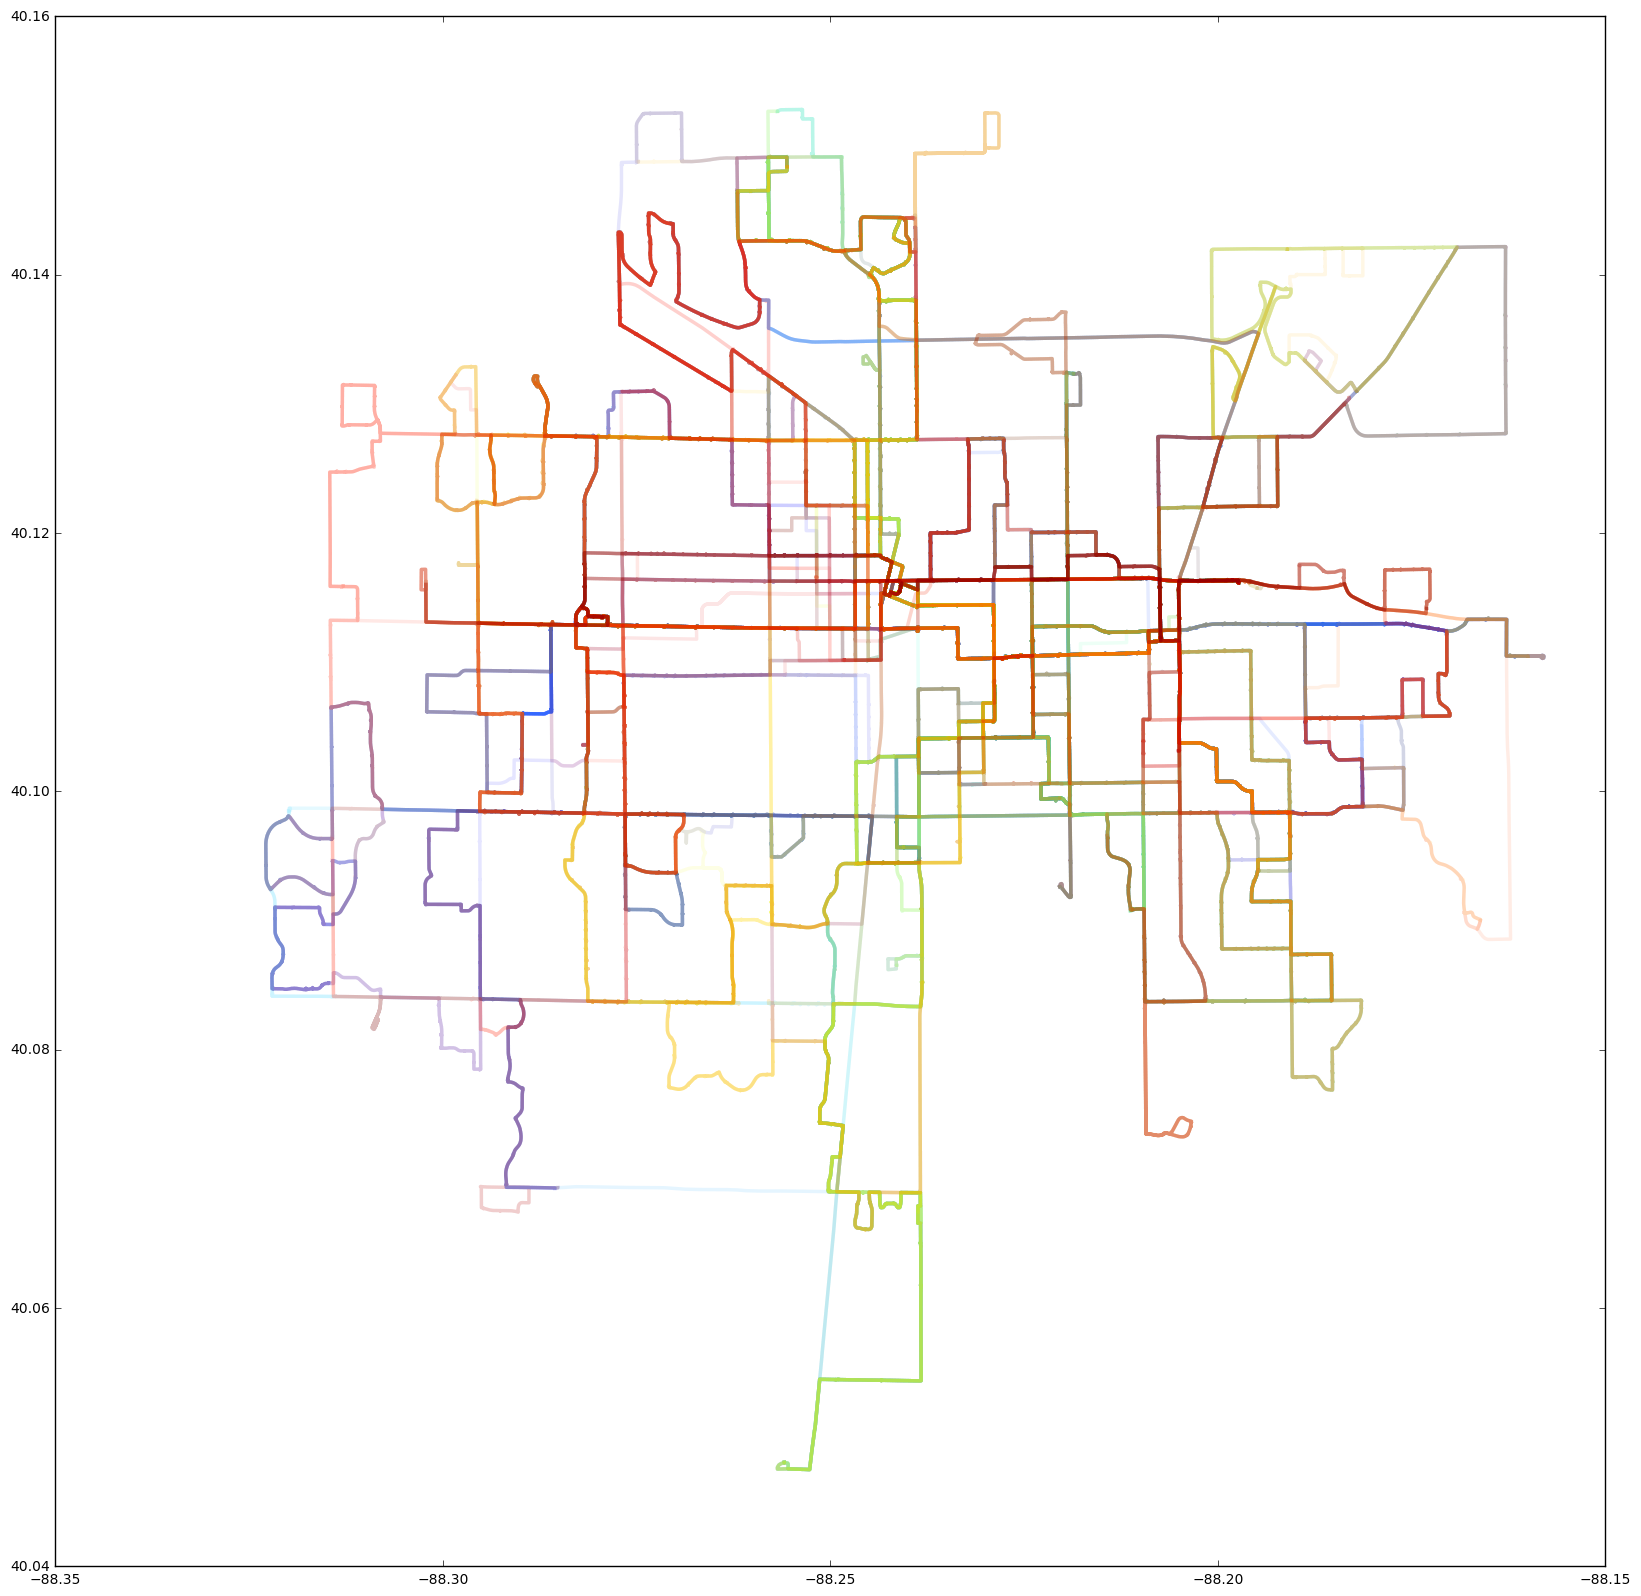

In [44]:
# from matplotlib import cm

mycolor=plt.cm.jet
color_id=np.linspace(0,1,677)
s=0
for name, group in df2:
    s=s+1 
#     print(name)
    #group.plot('shape_pt_lat','shape_pt_lon')
    plt.plot(group['shape_pt_lon'],group['shape_pt_lat'], color=plt.cm.jet(s/677), alpha = 0.1, linewidth = 2.5)
plt.show()

In [35]:
# 4. Xiaoliang Jiang
fn = "stops.txt"
with open(fn, "r") as f:
    reader = csv.reader(f)
    header = next(reader)
    data = {}
    for column in header:
        data[column] = []
    for row in reader:
        for column, value in zip(header, row):
            data[column].append(value)

In [36]:
class Dataset:
    def __init__(self, data):
        self.data = data
        
    def convert(self, column, dtype):
        self.data[column] = np.array(self.data[column], dtype=dtype)
        
    def columns(self):
        return self.data.keys()
    
    def filter_eq(self, column, value):
        good = (self.data[column] == value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_lt(self, column, value):
        good = (self.data[column] < value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_gt(self, column, value):
        good = (self.data[column] > value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def filter_ne(self, column, value):
        good = (self.data[column] != value)
        new_data = {}
        for column in self.data:
            new_data[column] = self.data[column][good]
        return Dataset(new_data)
    
    def size(self):
        for key in self.data:
            return self.data[key].size

    def split(self, column):
        new_datasets = {}
        for split_value in np.unique(self.data[column]):
            new_datasets[split_value] = self.filter_eq(column, split_value)
        return new_datasets

    def stats(self):
        statistics = {}
        for key in self.data:
            if self.data[key].dtype not in ("float", "int"):
                continue
            values = self.data[key]
            statistics[key] = (values.min(), values.max(), values.std(), values.mean())
        return statistics
    
    def compare(self, other):
        stats1 = self.stats()
        stats2 = other.stats()
        for column in self.columns():
            if column not in stats1: continue
            print("Column '{0:25s}'".format(column))
            for s1, s2 in zip(stats1[column], stats2[column]):
                print("    {0} vs {1}".format(s1, s2))
    
    def plot(self, x_column, y_column):
        plt.plot(self.data[x_column], self.data[y_column], '.')

In [37]:
header


['stop_id',
 'stop_code',
 'stop_name',
 'stop_desc',
 'stop_lat',
 'stop_lon',
 'zone_id',
 'stop_url',
 'location_type',
 'parent_station']

## 7. What is the walkability for CUMTD bus stop?

In [38]:
stopsdata= Dataset(data)
value_types = {'stop_ids': 'str',
               'stop_code': 'str',
               'stop_name':'str',
               'stop_desc':'str',
               'stop_lat':'float',
               'stop_lon':'float',
               'zone_id':'float',
               'stop_url':'str',
               'location_type':'str',
               'parent_station':'str'}
for v in stopsdata.columns():
    stopsdata.convert(v, value_types.get(v, "str"))

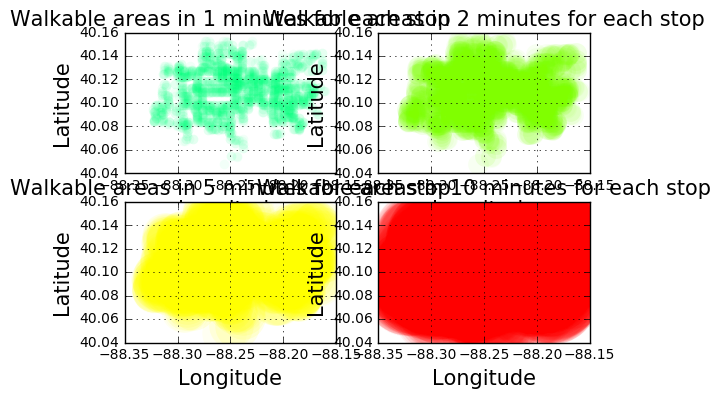

In [39]:
plt.subplot(221)
plt.rcParams["figure.figsize"] = (20, 20)
plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas in 1 minutes for each stop", fontsize=15)
plt.plot(data["stop_lon"],data["stop_lat"],c='#00ff80',marker='o',markersize=7,mec='none',ls='',alpha=0.05)
plt.subplot(222)
plt.rcParams["figure.figsize"] = (20, 20)
plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas in 2 minutes for each stop", fontsize=15)
plt.plot(data["stop_lon"],data["stop_lat"],c='#80ff00',marker='o',markersize=15,mec='none',ls='',alpha=0.05)
plt.subplot(223)
plt.rcParams["figure.figsize"] = (20, 20)
plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas in 5 minutes for each stop", fontsize=15)
plt.plot(data["stop_lon"],data["stop_lat"],c='#ffff00',marker='o',markersize=32,mec='none',ls='',alpha=0.05)
plt.subplot(224)
plt.rcParams["figure.figsize"] = (20, 20)
plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas in 10 minutes for each stop", fontsize=15)
plt.plot(data["stop_lon"],data["stop_lat"],c='#ff0000',marker='o',markersize=65,mec='none',ls='',alpha=0.05)

## explaination
**Accroding to the google map, 0.02 longitude at 40.06N latitude equals 1.1 miles. So the circle here represent a circle area with r=0.275mile which means an area which only take 5 minutes to walk.**

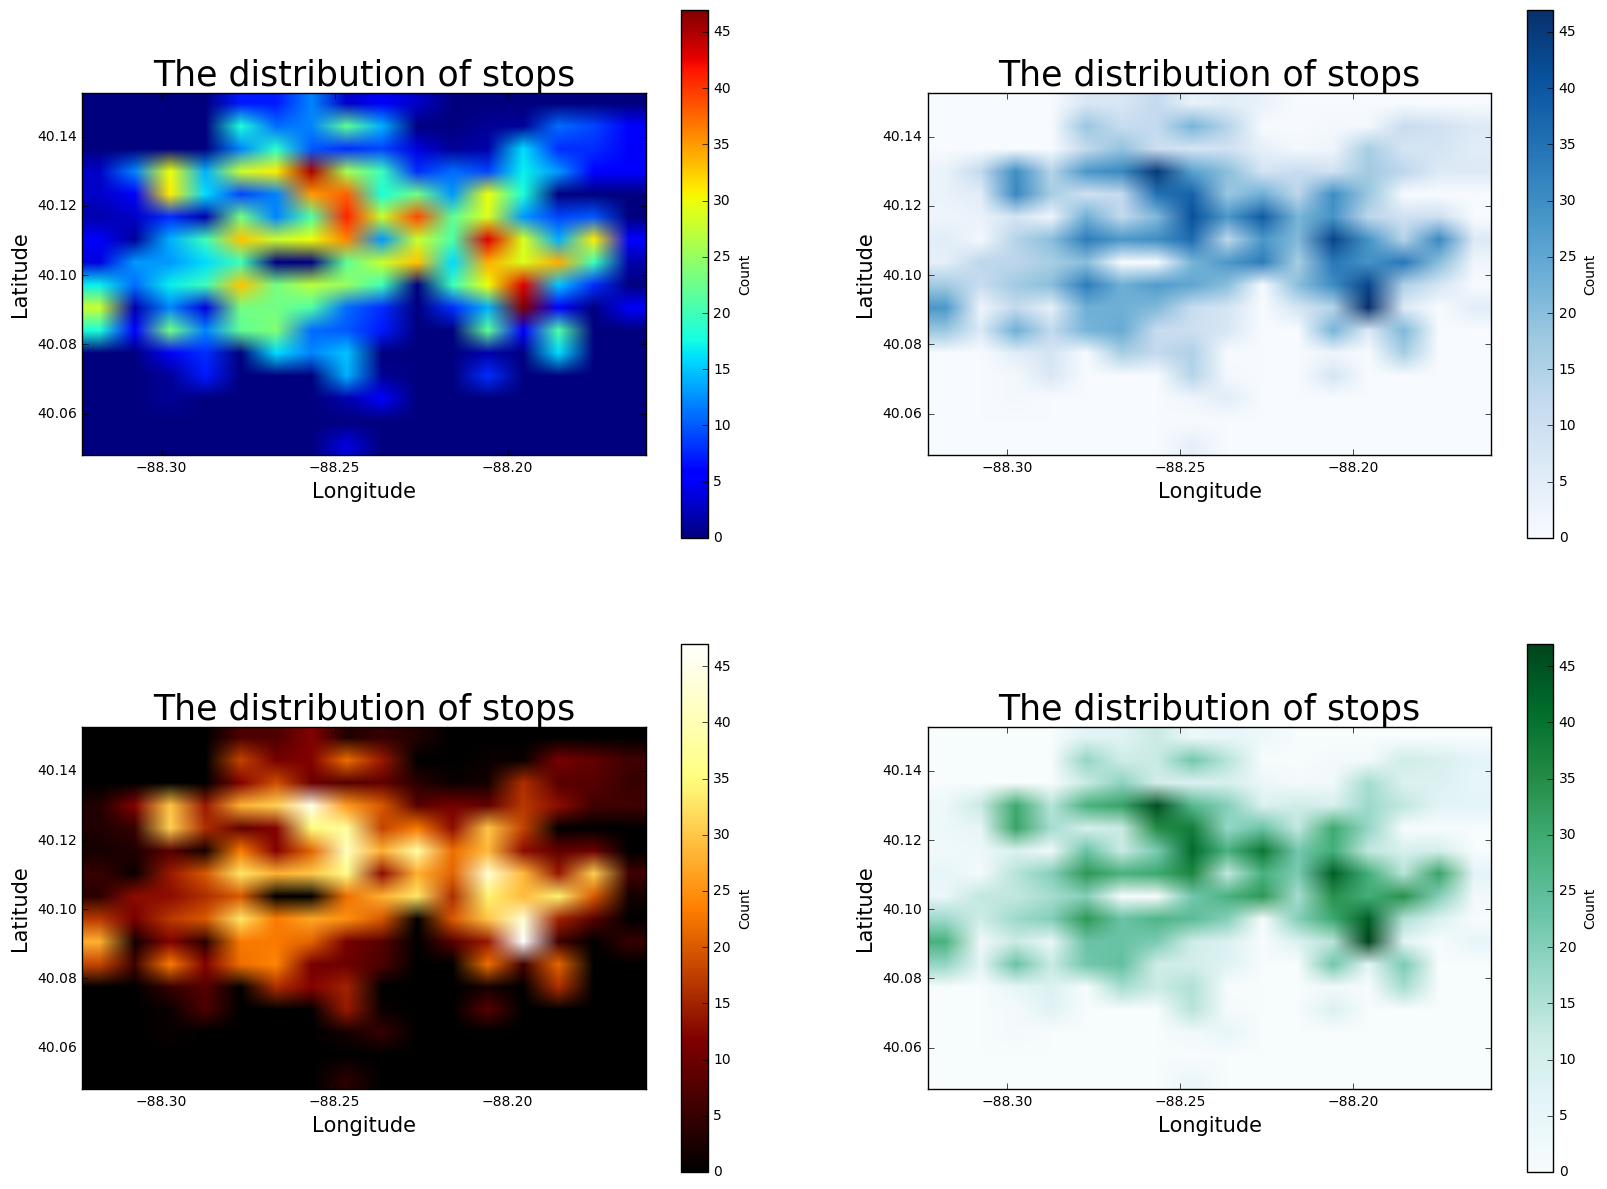

In [20]:
stats=stopsdata.stats()
plt.rcParams["figure.figsize"] = (20, 15)
stats=stopsdata.stats()
lon_min=stats["stop_lon"][0]
lon_max=stats["stop_lon"][1]
lat_min=stats["stop_lat"][0]
lat_max=stats["stop_lat"][1]
num_bins=16
lon=np.mgrid[lon_min:lon_max:(num_bins+1)*1j]
lat=np.mgrid[lat_min:lat_max:(num_bins+1)*1j]
tree_count=np.zeros((num_bins,num_bins))
for i in range(num_bins):
    left_lat=lat[i]
    right_lat=lat[i+1]
    filter_lat_left=stopsdata.filter_gt("stop_lat",left_lat)
    filter_lat_right=filter_lat_left.filter_lt("stop_lat",right_lat)
    for j in range(num_bins):
        left_lon=lon[j]
        right_lon=lon[j+1]
        filter_lon_left=filter_lat_right.filter_gt("stop_lon",left_lon)
        filter_lon_right=filter_lon_left.filter_lt("stop_lon",right_lon)
        tree_count[i,j] +=filter_lon_right.size()
#plt.xlim(lon_min,lon_max)
#plt.ylim(lat_min,lat_max)
plt.subplot(221)
plt.imshow(tree_count, extent=(lon_min,lon_max,lat_min,lat_max),origin="lower")
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("The distribution of stops", fontsize=25)
color_bar=plt.colorbar()
color_bar.set_label("Count")
plt.subplot(222)
plt.imshow(tree_count, extent=(lon_min,lon_max,lat_min,lat_max),origin="lower",cmap =plt.cm.Blues)
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("The distribution of stops", fontsize=25)
color_bar=plt.colorbar()
color_bar.set_label("Count")
plt.subplot(223)
plt.imshow(tree_count, extent=(lon_min,lon_max,lat_min,lat_max),origin="lower", cmap = plt.cm.afmhot)
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("The distribution of stops", fontsize=25)
color_bar=plt.colorbar()
color_bar.set_label("Count")

plt.subplot(224)
plt.imshow(tree_count, extent=(lon_min,lon_max,lat_min,lat_max),origin="lower", cmap = plt.cm.BuGn)
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("The distribution of stops", fontsize=25)
color_bar=plt.colorbar()
color_bar.set_label("Count")

## 9. What is density of bus stops? (graph above)


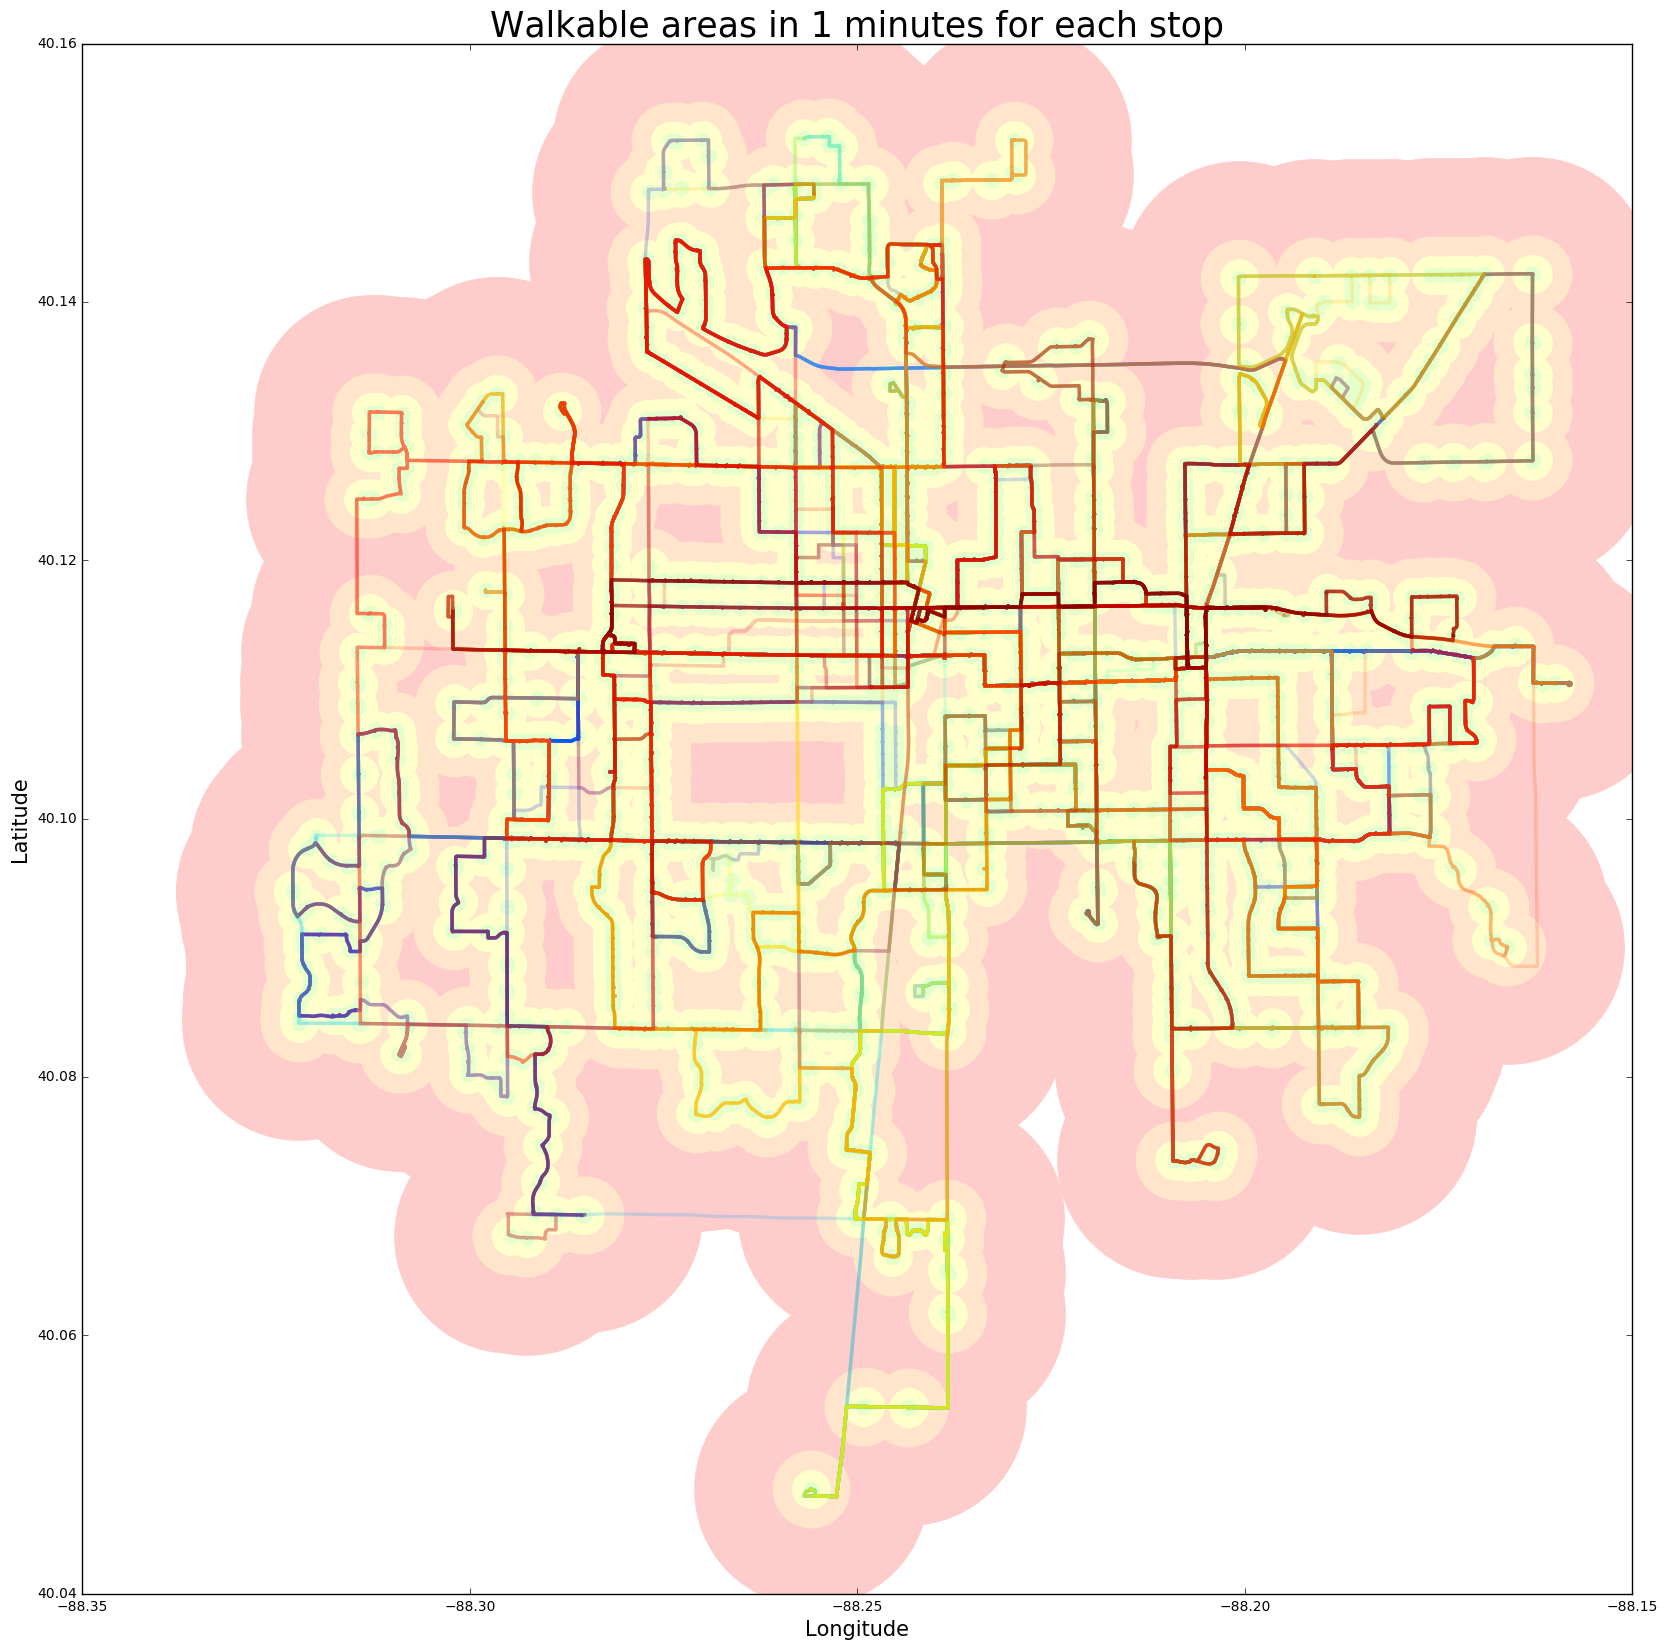

In [45]:
plt.rcParams["figure.figsize"] = (20, 20)

plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas in 10 minutes for each stop", fontsize=25)
plt.plot(data["stop_lon"],data["stop_lat"],c='#ffcccc',marker='o',markersize=169,mec='none',ls='') #15min

plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas in 5 minutes for each stop", fontsize=25)
plt.plot(data["stop_lon"],data["stop_lat"],c='#ffe5cc',marker='o',markersize=56,mec='none',ls='') #10min

plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas in 2 minutes for each stop", fontsize=25)
plt.plot(data["stop_lon"],data["stop_lat"],c='#ffffcc',marker='o',markersize=28,mec='none',ls='') #5min

plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas in 1 minutes for each stop", fontsize=25)
plt.plot(data["stop_lon"],data["stop_lat"],c='#e5ffcc',marker='o',markersize=11.2,mec='none',ls='')#2min

mycolor=plt.cm.jet
color_id=np.linspace(0,1,677)
s=0
for name, group in df2:
    s=s+1 
#     print(name)
    #group.plot('shape_pt_lat','shape_pt_lon')
    plt.plot(group['shape_pt_lon'],group['shape_pt_lat'], color=plt.cm.jet(s/677), alpha = 0.2, linewidth = 2.5)
plt.show()


### 300 size = 2.65 mile r = 1.325 mile = 2.1324 km 80m/min 300 size = 26.66 min 11.2528 size = 1min

### -88.35 to -88.15 10.58mile=17.03km 1 latitude =111km

### 0.12 latitude=13.32km 1.278513.32 0.121.2785=0.15342 40.10+-0.07671=

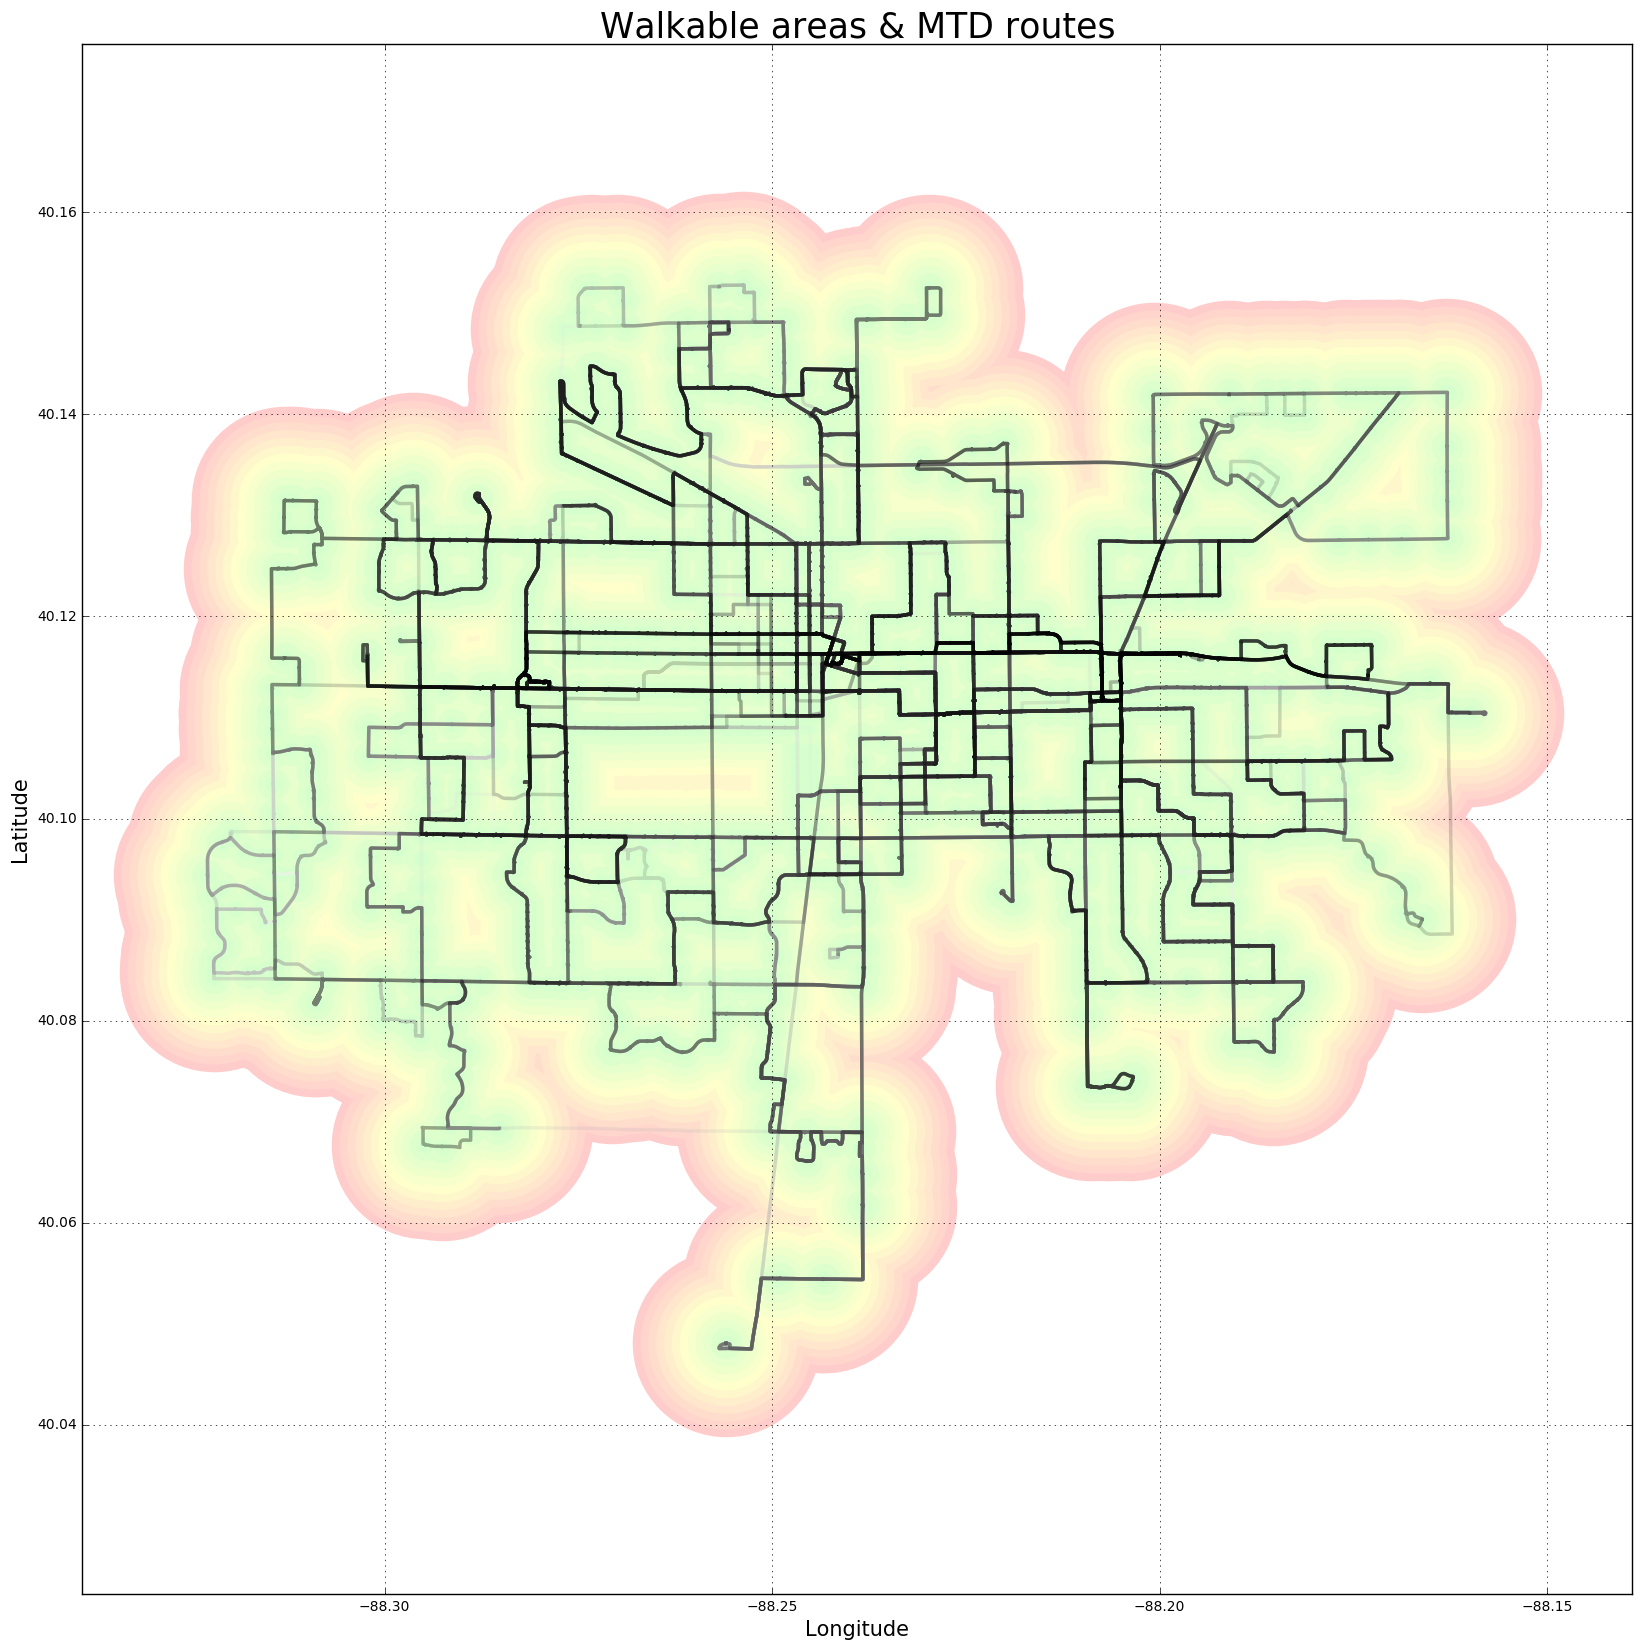

In [46]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.grid()
plt.xlabel("Longitude",fontsize=15)
plt.ylabel("Latitude",fontsize=15)
plt.title("Walkable areas & MTD routes", fontsize=25)
plt.xlim(-88.339,-88.139)
plt.ylim(40.02329,40.17671)
r=11.2528
colorlist=("#ffcccc","#ffd5cc","#ffddcc","#ffe6cc","#ffeecc","#fff7cc","#ffffcc","#f7ffcc","#eeffcc","#e6ffcc","#ddffcc","#d5ffcc")

for i in range(12,0,-1):
    plt.plot(data["stop_lon"],data["stop_lat"],color=colorlist[12-i],marker='o',markersize=11.2528*i,mec='none',ls='')

mycolor=plt.cm.jet
color_id=np.linspace(0,1,677)
s=0
for name, group in df2:
    s=s+1 
#     print(name)
    #group.plot('shape_pt_lat','shape_pt_lon')
    plt.plot(group['shape_pt_lon'],group['shape_pt_lat'], color=plt.cm.binary(s/677), alpha = 0.2, linewidth = 2.5)
plt.show()

In [23]:
import pandas as pd
import numpy as np
import plotly
import plotly.plotly as py
from plotly.graph_objs import *

In [24]:
plotly.tools.set_credentials_file(username='alexbear', api_key='L6m9DmfDjqrksfHtUH5j')
mapbox_access_token = 'pk.eyJ1IjoieGlhb2xpYW5namlhbmciLCJhIjoiY2l6OWJhZTZqMDFoMDJ3cG82Znhja3dodCJ9.88BUSeqz4H2xm8bemGd4VQ'

In [25]:
df = pd.read_csv('stops.txt',encoding='iso-8859-1')

## 10. How stops located on map?

In [26]:
data = Data([
    Scattermapbox(
        lat=df['stop_lat'],
        lon=df['stop_lon'],
        mode='markers',
        marker=Marker(
            color='#FF9933',
            opacity=0.2,
            size=9
        ),
        text='Stopname: '+df['stop_name'],
    )
])
layout = Layout(
    title="Distribution of MTD stops in Champaign <br>(Hover for breakdown)",
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=40.11,
            lon=-88.23
        ),
        pitch=0,
        zoom=10
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Multiple Mapbox')